## El DataSet proporcionado contiene información sobre Proveedores de Carnes, Productos, Fechas y Precios. 

### **Pasos a seguir:**

**1.- Exploración de Datos:**
* Resumen estadístico del dataset.
* Análisis de valores nulos y duplicados.

**2.- Preprocesamiento:**
* Conversión de fechas a un formato adecuado y extracción de características temporales.
* Codificación de variables categóricas.
* Normalización o estandarización de precios.

In [2]:
# 1.- Cargamos las Librerias

import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sb
import matplotlib.pyplot as plt
# %matplotlib inline
from sklearn import datasets
from sklearn import linear_model
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Exploración de Datos

**Primero, realizaremos un análisis exploratorio de los datos para entender mejor su estructura y contenido.**

In [3]:
# 2.- Cargamos el DataSet

dfcarnes = pd.read_excel("Carnes.xlsx")
dfcarnes.head(8)

,proveedor,Categoria,producto,fecha,precio
0,Alta Performance,Carniceria,Asado x Kg.,06/06/2024 14:51:34,7490
1,Alta Performance,Carniceria,Asado x Kg.,07/06/2024 14:28:17,7490
2,Alta Performance,Carniceria,Asado x Kg.,07/06/2024 15:07:42,7490
3,Alta Performance,Carniceria,Asado x Kg.,09/06/2024 15:31:05,7490
4,Alta Performance,Carniceria,Asado x Kg.,10/06/2024 14:38:28,7490
5,Alta Performance,Carniceria,Asado x Kg.,23/05/2024 13:33:03,8290
6,Alta Performance,Carniceria,Asado x Kg.,23/05/2024 13:33:03,8290
7,Alta Performance,Carniceria,Asado x Kg.,28/05/2024 15:29:30,8290


El DataSet tiene 6558 registros y Cinco (5) Columnas: 1.Proveedor, 2.Categoria, 3.Producto, 4.Fecha y 5.Precio. 

In [4]:
# 3.- Analisis Descriptivo.

dfcarnes.describe(include='all')

,proveedor,Categoria,producto,fecha,precio
count,6558,6558,6558,6558,6558.000000
unique,15,1,38,1096,NaN
top,La Anonima,Carniceria,Matambre x Kg.,11/06/2024 15:37:41,NaN
freq,681,6558,479,38,NaN
mean,NaN,NaN,NaN,NaN,7960.058554
std,NaN,NaN,NaN,NaN,2090.009975
min,NaN,NaN,NaN,NaN,1900.000000
25%,NaN,NaN,NaN,NaN,6500.000000
50%,NaN,NaN,NaN,NaN,7990.000000
75%,NaN,NaN,NaN,NaN,8999.000000


In [5]:
# 4.- Información general del dataset

print(dfcarnes.info())
print(dfcarnes.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6558 entries, 0 to 6557
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   proveedor  6558 non-null   object
 1   Categoria  6558 non-null   object
 2   producto   6558 non-null   object
 3   fecha      6558 non-null   object
 4   precio     6558 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 256.3+ KB
None
(6558, 5)


El Resumen Estadístico nos muestra que:

- Hay 6559 registros en total.
- Hay 15 proveedores y 39 productos únicos.
- La columna de fecha tiene 1097 valores únicos.
- El precio promedio es de aproximadamente 7959.07, con una desviación estándar de 2091.37.
- Los precios varían desde 1490 hasta 17730.

**Realizamos una Descipcion Basica de las distintas variables del DataSet**

* Cantidad: 6559
* Media: 7959.07
* Devio Standard: 2091.37 
* Valor Minimo: 1490
* Primer Cuartil: 6500
* Segundo Cuartil: 7990
* Tercer Cuartil: 8999
* Valor Maximo: 17730

### Preprocesamiento de Datos

* Eliminación de duplicados: Eliminaremos los registros duplicados.
* Conversión de la columna de Fecha: Convertiremos la columna de Fecha al tipo datetime y quedara solo año/mes/día.

In [6]:
# 5.- Verificar valores nulos y valores duplicados

nulos = dfcarnes.isnull().sum()
duplicados = dfcarnes.duplicated().sum()

# 6.- Eliminación de duplicados

dfcarnes = dfcarnes.drop_duplicates()

nulos, duplicados

(proveedor    0
 Categoria    0
 producto     0
 fecha        0
 precio       0
 dtype: int64,
 120)

In [7]:
# 7- Convertir a solo la fecha (eliminar horas, minutos y segundos)

dfcarnes['fecha'] = pd.to_datetime(dfcarnes['fecha'], format='%d/%m/%Y %H:%M:%S')
dfcarnes['fecha'] = dfcarnes['fecha'].dt.date
dfcarnes.fecha.head()

0    2024-06-06
1    2024-06-07
2    2024-06-07
3    2024-06-09
4    2024-06-10
Name: fecha, dtype: object

**Al DataSet se han eliminando registros duplicados y se convirtio fecha en el tipo de dato necesario.**

In [45]:
# 8- Muestro como queda par ver la columna Fecha

dfcarnes.head(8)
# dfcarnes[dfcarnes.proveedor == "La Anonima"].head

,proveedor,Categoria,producto,fecha,precio
0,Alta Performance,Carniceria,Asado x Kg.,2024-06-06,7490
1,Alta Performance,Carniceria,Asado x Kg.,2024-06-07,7490
2,Alta Performance,Carniceria,Asado x Kg.,2024-06-07,7490
3,Alta Performance,Carniceria,Asado x Kg.,2024-06-09,7490
4,Alta Performance,Carniceria,Asado x Kg.,2024-06-10,7490
5,Alta Performance,Carniceria,Asado x Kg.,2024-05-23,8290
7,Alta Performance,Carniceria,Asado x Kg.,2024-05-28,8290
8,Alta Performance,Carniceria,Asado x Kg.,2024-05-02,9290


## Visualización de Datos

<Figure size 1200x800 with 0 Axes>

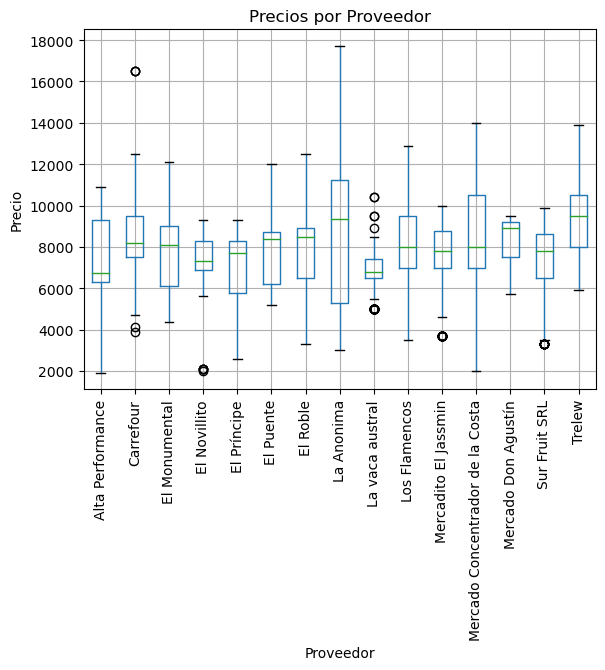

In [33]:
# 9- Boxplot para Visualizar los Precios por Proveedor

plt.figure(figsize=(12, 8))
dfcarnes.boxplot(column='precio', by='proveedor', grid=True, rot=90)
plt.title('Precios por Proveedor')
plt.suptitle('') 
plt.xlabel('Proveedor')
plt.ylabel('Precio')
plt.show()

**Análisis del gráfico "Precios por Proveedor**

El gráfico "Precios por Proveedor" muestra los precios de los Productos ofrecidos por los diferentes Proveedores, el eje horizontal del gráfico muestra los Proveedores, mientras que el eje vertical muestra los Precios.

Los precios de los productos son relativamente estables entre los diferentes proveedores, sin embargo, hay algunas variaciones en los precios, especialmente para algunos productos específicos. 

Por ejemplo, el precio del producto "Alta Performance" varía desde 10000 hasta 18000, mientras que el precio del producto "La vaca austral varía desde 6000 hasta 8000.

In [41]:
# 10- Filtro los Datos de un proveedor específico - Ejemplo: Mercado el Jassmin

dfproveedor = dfcarnes[dfcarnes['proveedor'] == 'Mercadito El Jassmin']
dfproveedor.head(8)

,proveedor,Categoria,producto,fecha,precio
326,Mercadito El Jassmin,Carniceria,Asado x Kg.,2024-05-02,7490
327,Mercadito El Jassmin,Carniceria,Asado x Kg.,2024-05-03,7490
328,Mercadito El Jassmin,Carniceria,Asado x Kg.,2024-05-04,7490
329,Mercadito El Jassmin,Carniceria,Asado x Kg.,2024-05-06,7490
330,Mercadito El Jassmin,Carniceria,Asado x Kg.,2024-05-07,7490
331,Mercadito El Jassmin,Carniceria,Asado x Kg.,2024-05-08,7490
332,Mercadito El Jassmin,Carniceria,Asado x Kg.,2024-05-09,7490
333,Mercadito El Jassmin,Carniceria,Asado x Kg.,2024-05-10,7490


<Figure size 1200x800 with 0 Axes>

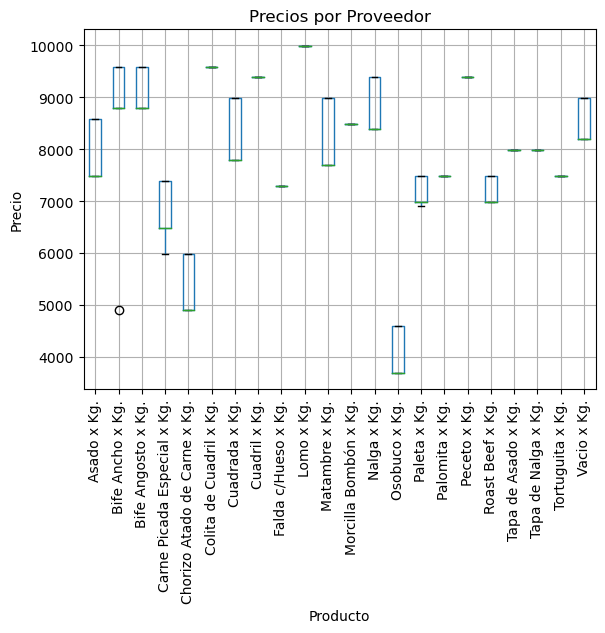

In [40]:
# 11- Boxplot de Precios de los Productos por un Proveedor especifico

plt.figure(figsize=(12, 8))
dfproveedor.boxplot(column='precio', by='producto', grid=True, rot=90)
plt.title('Precios por Proveedor')
plt.suptitle('') 
plt.xlabel('Producto')
plt.ylabel('Precio')
plt.show()

**El gráfico muestra los precios de 23 productos de cortes de Carnes de un mismo proveedor.**

Los precios varían considerablemente, desde un mínimo 4000 para la carne picada especial hasta un máximo de 10000 para el Asado.
Productos más caros son el asado, el bife ancho, el bife angosto y los Productos más baratos son la carne picada especial, la falda c/hueso, por nombrar Productos.

Ejemplos: 

* El precio del asado ha aumentado significativamente en los últimos meses, el precio actual es de 10000 por kg, lo que lo convierte en el producto más caro del gráfico.

* El precio de la carne picada especial ha sido relativamente estable en estos meses, el precio actual es de 4000 por kg, lo que lo convierte en el producto más barato del gráfico.

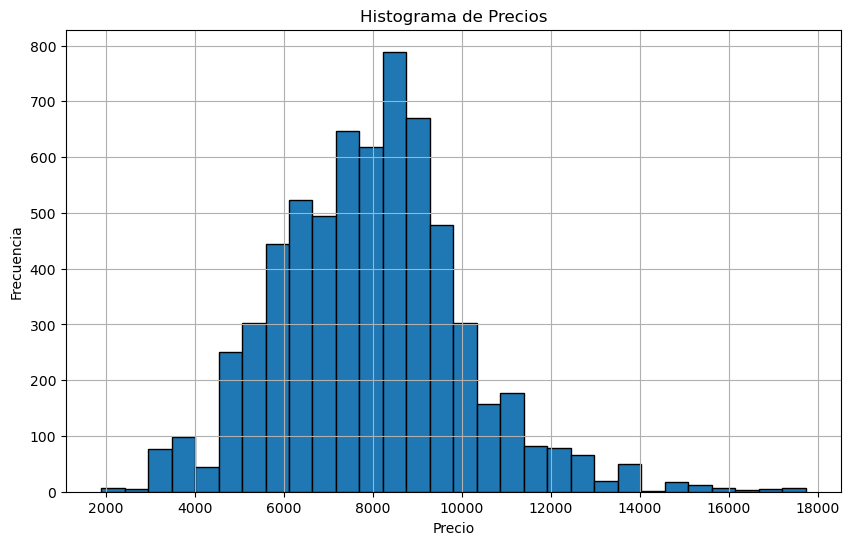

In [17]:
# 12- Histograma de precios de todos los productos

plt.figure(figsize=(10, 6))
plt.hist(dfcarnes['precio'], bins=30, edgecolor='black')
plt.title('Histograma de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

**Análisis de la distribución de los Precios**

La distribución es asimétrica a la derecha ya que la mayoría de los precios se encuentran en el extremo inferior del rango de precios, y hay una menor cantidad de precios en el extremo superior.

In [48]:
# 13- Filtrar datos de un producto específico para la serie temporal (ejemplo: 'Asado x Kg.')

dfproveedor_producto = dfcarnes[dfcarnes['proveedor'] == 'Alta Performance']
dfnalga = dfproveedor_producto[dfproveedor_producto['producto'] == 'Asado x Kg.']

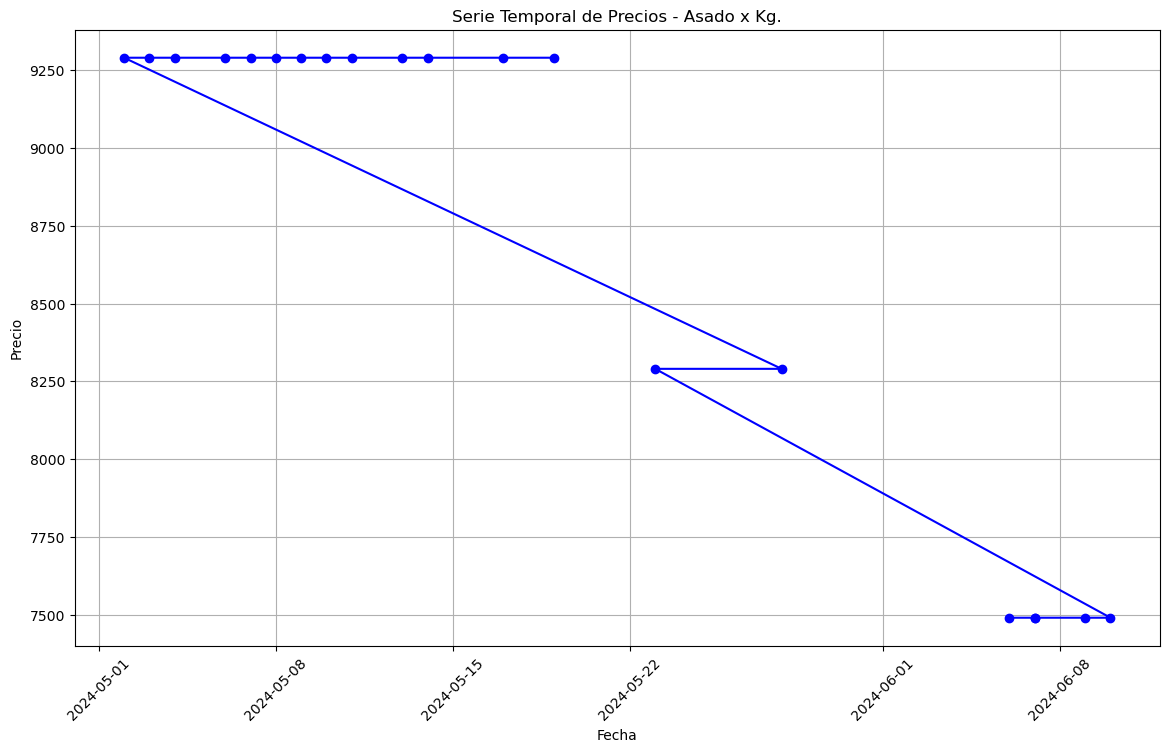

In [50]:
# 14- Serie temporal de precios para 'Asado x Kg.'

plt.figure(figsize=(14, 8))
plt.plot(dfnalga['fecha'], dfnalga['precio'], marker='o', linestyle='-', color='b')
plt.title('Serie Temporal de Precios - Asado x Kg.')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

El gráfico muestra una tendencia decreciente del Precio del Asado por Kg. durante el período que se analiza, el precio comienza en 9250 el 1/5/24 y termina en 7750 el 8/6/24 lo que representa una disminución representa una caída del 16,5 %.

La mayor caída se produce entre el 1/5 y el 8/5, cuando el precio baja de 9250 a 8750, una disminución del 5,3 %. 
A partir de ahi, el precio se modera, con una disminución del 2,4 % entre el 8/5 y el 15/5, del 0,7 % y asi hasta caer un 1,3 % entre el 22/5 y el 8/6.

In [55]:
# 14- Grafico de Dispersion de los Precios de todos sus productos

dfproveedor_productos = dfcarnes[dfcarnes['proveedor'] == 'Trelew']

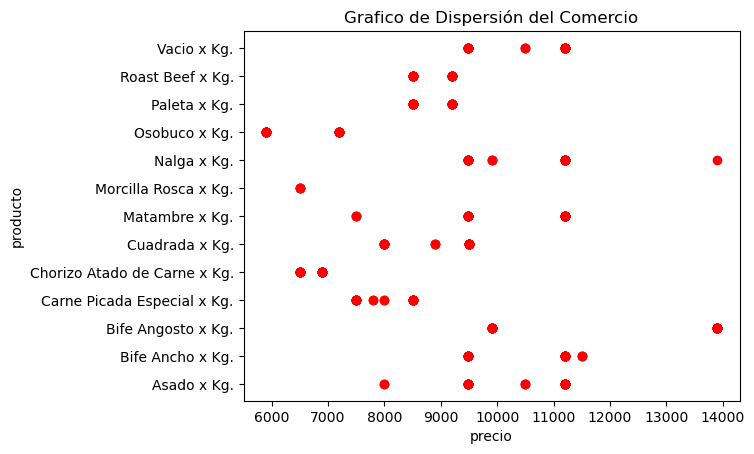

In [59]:
plt.scatter (dfproveedor_productos.precio, dfproveedor_productos.producto, c="red")
plt.xlabel('precio')
plt.ylabel('producto')
plt.title('Grafico de Dispersión del Comercio')
plt.show()

Los puntos de datos están dispersos por todo el gráfico, lo que indica que no hay una relación lineal perfecta y no se observan valores atípicos en el gráfico.

Text(0.5, 1.0, 'Histograma')

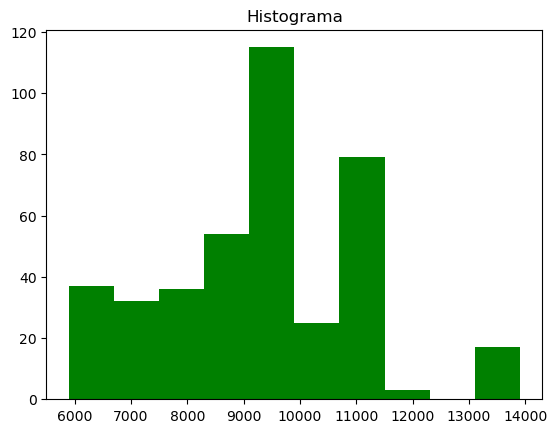

In [65]:
# 14- Histograma que muetra cantidad de productos en cada rango de precios

plt.hist(dfproveedor_productos.precio, color="green")
plt.title('Histograma')

El Histograma indica que la mayor cantidad de cortes de carnes se venden en un rango de precios relativamente estrecho, alrededor de 9000 a 1000.

#### Corresponde la la Segunda Entrega - 17/06